<a href="https://colab.research.google.com/github/Anku5hk/The_ML_Workflow/blob/master/Fast_ai_assignments/Fastai_followup_chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [42]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [45]:
# image names
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_166.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_159.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_187.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_234.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_12.jpg')]

In [0]:
import numpy as np
import pandas as pd

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
# extract labels here the file names are the labels themselves
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

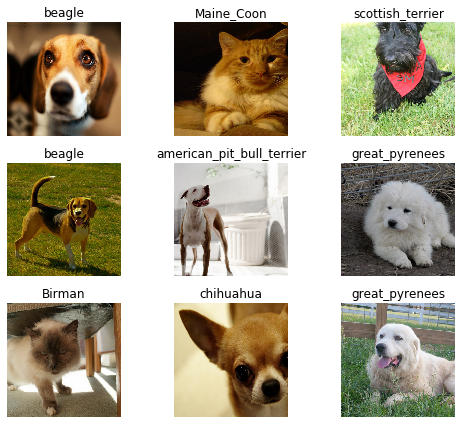

In [49]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
# print labels names 
#data.classes
print(len(data.classes))

37


In [0]:
# create model

my_model = cnn_learner(data, models.resnet34, metrics=error_rate)

In [55]:
my_model.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [56]:
my_model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.396230,0.350159,0.109608,01:23
1,0.626169,0.326286,0.102165,01:22
2,0.394819,0.245786,0.084574,01:21
3,0.280488,0.237915,0.077131,01:19


In [0]:
# save model with name my_model-1, saves weights and model(optional)
my_model.save('my_model1')

In [0]:
# interpretation method for classification model
model_interpreter = ClassificationInterpretation.from_learner(my_model)

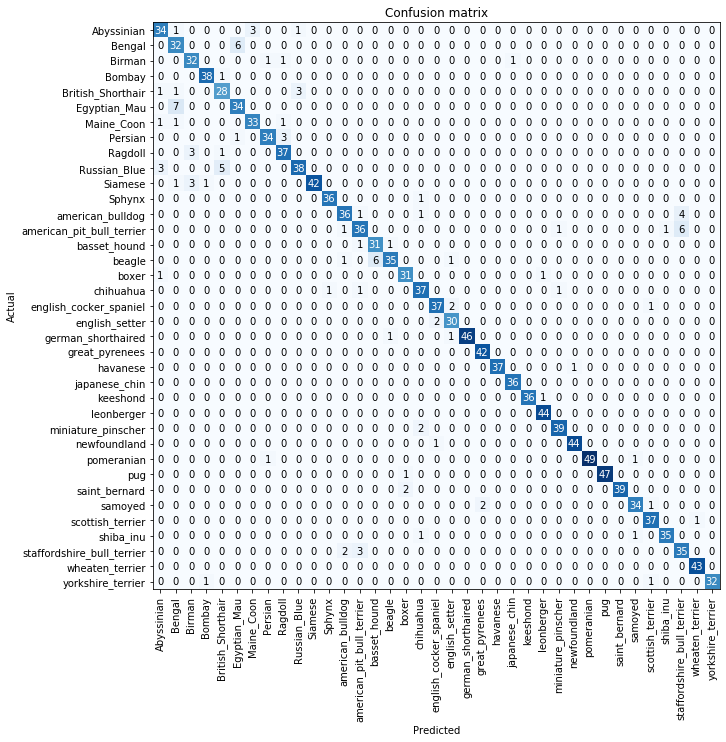

In [0]:
# plot a confusion matrix
model_interpreter.plot_confusion_matrix(figsize=(10,15))

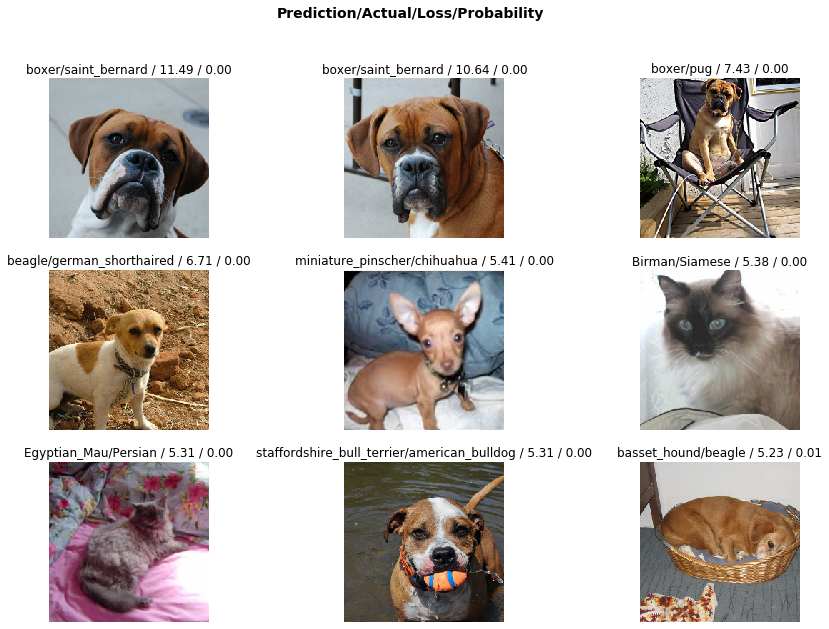

In [0]:
model_interpreter.plot_top_losses(9, figsize=(15,10))

In [30]:
# descending order of bad predictions (values(actual, predicted, times_occured))
model_interpreter.most_confused(min_val = 2)

[('Egyptian_Mau', 'Bengal', 7),
 ('Bengal', 'Egyptian_Mau', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('beagle', 'basset_hound', 6),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('Abyssinian', 'Maine_Coon', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Persian', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'Abyssinian', 3),
 ('Siamese', 'Birman', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('saint_bernard', 'boxer', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
# to be able to re-trained all layers
my_model.unfreeze()

In [32]:
my_model.fit_one_cycle(1)
# re-training our model, loss has gone up. very bad idea.

epoch,train_loss,valid_loss,error_rate,time
0,0.337517,0.276714,0.090663,01:24


In [35]:
my_model.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


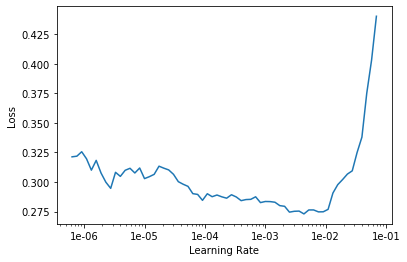

In [38]:
my_model.recorder.plot() # to pick the optimzed learning rate based on loss so smaller is better. 
# lets load previous model and check the lr

In [58]:
# load previous model state and see the difference
my_model.load('my_model1');
my_model.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


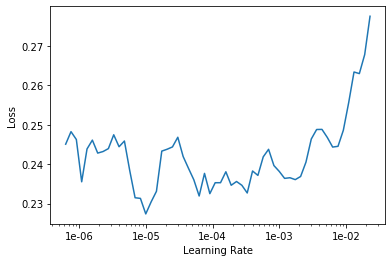

In [59]:
my_model.recorder.plot()

In [60]:
my_model.unfreeze()
my_model.fit_one_cycle(2, max_lr=slice(1e-6, 1e-5)) # here 1e-6, 1e-5 seems optimal

epoch,train_loss,valid_loss,error_rate,time
0,0.250716,0.233450,0.077808,01:22
1,0.219630,0.230344,0.075778,01:22


In [0]:
# now the result down to 0.075(first model tested was 77.)
# lr makes an important hyperpara to tune

In [61]:
# another test using 1e-4 , re-loading model then training
my_model.load('my_model1')
my_model.unfreeze()
my_model.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.252605,0.229644,0.075101,01:22
1,0.214718,0.222278,0.071719,01:22


In [0]:
# 0.71 NICE!

In [63]:
doc(get_transforms)